# Matplotlib SubPlots - несколько графиков рядом друг с другом
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
a = np.linspace(0, 10, 11)
b = a ** 4

In [6]:
a

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [8]:
b

array([0.000e+00, 1.000e+00, 1.600e+01, 8.100e+01, 2.560e+02, 6.250e+02,
       1.296e+03, 2.401e+03, 4.096e+03, 6.561e+03, 1.000e+04])

In [14]:
x = np.arange(0, 10)
y = 2 * x

In [16]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
y

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

## plt.subplots()
Метод `plt.subplots()` позволяет автоматически разместить несколько наборов осей рядом друг с другом.

`plt.subplots()` возвращает кортеж, который обычно обозначается (fig, axes):
* fig - это весь объект Figure
* axes - массив numpy с отдельными парами осей, в порядке их расположения в объекте Figure

В данном случае используется распаковка кортежа для того, чтобы получить сразу два объекта - объект Figure и массив numpy с набором осей.

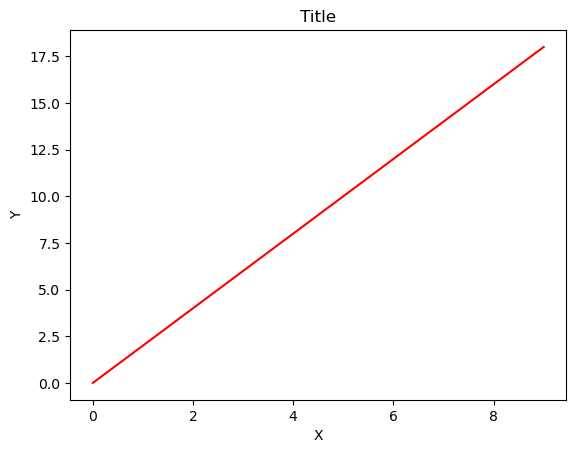

In [25]:
# Очень похоже на plt.figure(), но здесь мы используем
# распаковку кортежа для получения значений fig и axes
fig, axes = plt.subplots()

# Далее с помощью объекта axes указываем значения для атрибутов
axes.plot(x, y, 'r')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_title('Title')

plt.show()

## Добавляем строки и колонки
При создании объекта subplots() можно указать количество строк и колонок:

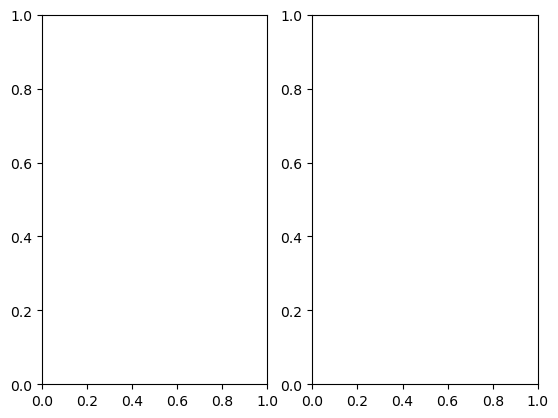

In [50]:
# Создаём поле размером 1 на 2 - 1 строка и 2 колонки
fig, axes = plt.subplots(nrows=1, ncols=2)

plt.show()

In [36]:
# Axes - Это массив с наборами осей, на которых можно рисовать графики
type(axes)

numpy.ndarray

In [38]:
# Одномерный массив из двух элементов 
# (один для пары осей слева второй для пары осей справа)
axes

array([<Axes: >, <Axes: >], dtype=object)

In [34]:
axes.shape

(2,)

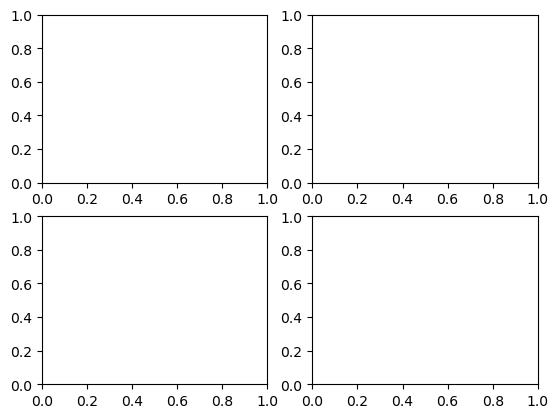

In [52]:
# Пустое поле размером 2 на 2
fig, axes = plt.subplots(nrows=2, ncols=2)

plt.show()

In [42]:
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [44]:
axes.shape

(2, 2)

## Нанесение графиков на объект axes
Графики рисуются с помощью метода **.plot()** для каждого из набора осей. Для атрибутов также используются методы **.set_**

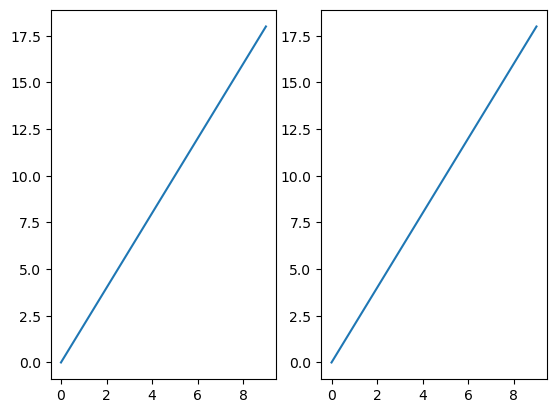

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for axe in axes:
    axe.plot(x, y)

plt.show()

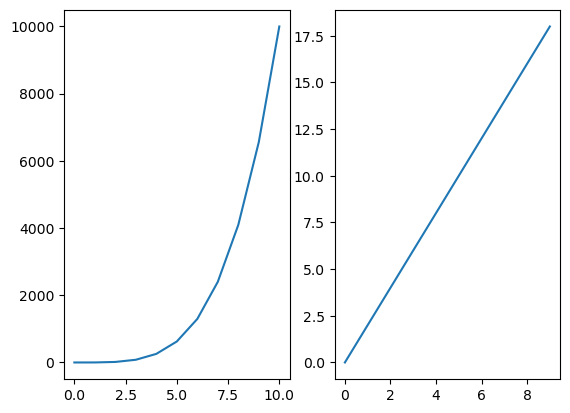

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(a, b)
axes[1].plot(x, y)

plt.show()

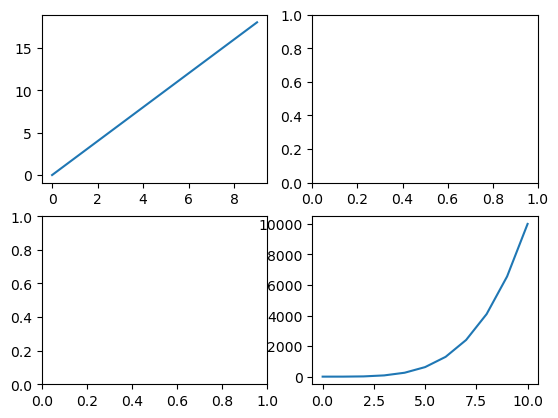

In [63]:
# На выходе получаем двумерный массив!
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0][0].plot(x, y)
axes[1][1].plot(a, b)

plt.show()

Часта проблема в matplotlib - это наложение графиков друг на друга. Чтобы решить эту проблему, можно использовать методы **fig.tight_layout()** или **plt.tight_layout()** для автоматической подгонки осей, чтобы не было пересечений:

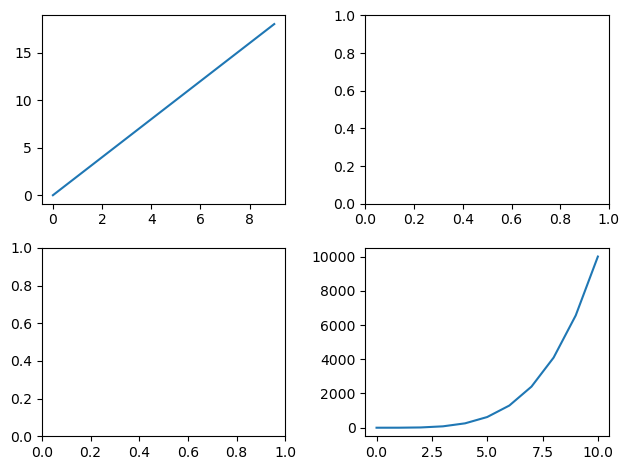

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0][0].plot(x, y)
axes[1][1].plot(a, b)

plt.tight_layout()    # Надо указывать в самом конце
plt.show()

## Параметры subplots()

У нас есть два объекта - Figure и axes, свойства которых можно редактировать.

### Ручное указание размеров в subplots()
**.subplots_adjust()** позволяет указывать размеры вручную.

Документация: https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots_adjust.html

Примеры:
* left=0.125 # Отступ слева
* right=0.9  # Отступ справа
* bottom=0.1 # Отступ снизу
* top=0.9    # Отступ сверху
* wspace=0.2 # Ширина между отдельными наборами осей, измеряемая как доля от средней ширины осей
* hspace=0.2 # Высота между наборами осей, измеряемая как доля от средней высоты осей

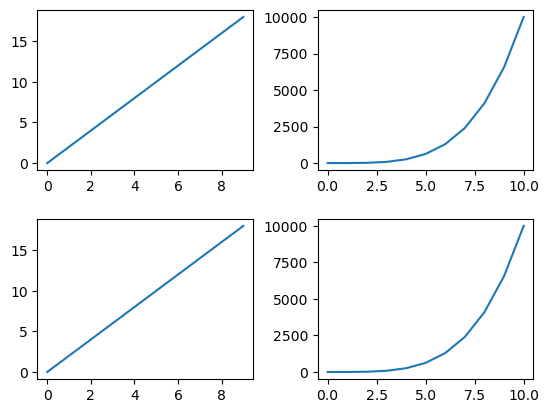

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0][0].plot(x, y)
axes[0][1].plot(a, b)
axes[1][0].plot(x, y)
axes[1][1].plot(a, b)

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

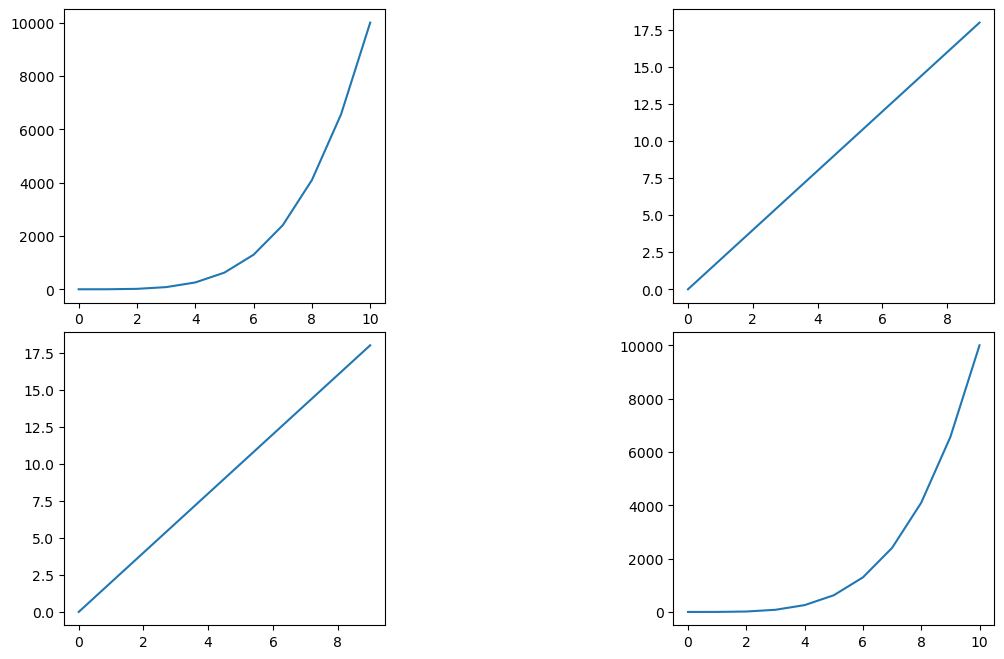

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0][0].plot(a, b)
axes[0][1].plot(x, y)
axes[1][0].plot(x, y)
axes[1][1].plot(a, b)

# С помощью left, right, top, bottom можно двигать наборы осей
# С помощью wspace, hspace можно регулироать расстояния между наборами осей
fig.subplots_adjust(left=None,
                   bottom=None,
                   right=None,
                   top=None,
                   wspace=0.9,
                   hspace=0.1)

plt.show()

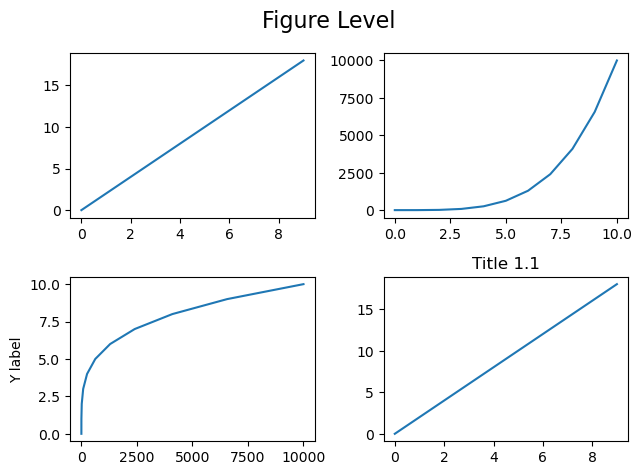

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# Сначала устанавливаются параметры axes

# Параметры на уровне объекта axes
axes[0][0].plot(x, y)

axes[0][1].plot(a, b)

axes[1][0].plot(b, a)
axes[1][0].set_ylabel('Y label')

axes[1][1].plot(x, y)
axes[1][1].set_title('Title 1.1')

# Далее устанавливаются общие параметры Figure

# Параметры на уровне объекта Figure
fig.suptitle('Figure Level', fontsize=16)

plt.tight_layout()

plt.show()

## Экспорт plt.subplots()

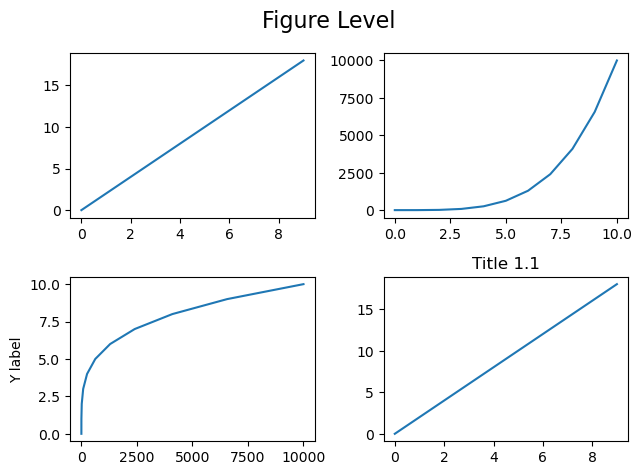

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# Сначала устанавливаются параметры axes

# Параметры на уровне объекта axes
axes[0][0].plot(x, y)

axes[0][1].plot(a, b)

axes[1][0].plot(b, a)
axes[1][0].set_ylabel('Y label')

axes[1][1].plot(x, y)
axes[1][1].set_title('Title 1.1')

# Далее устанавливаются общие параметры Figure

# Параметры на уровне объекта Figure
fig.suptitle('Figure Level', fontsize=16)

plt.tight_layout()

fig.savefig('new_subplots.png', bbox_inches='tight')

plt.show()

---